In [241]:
#Importing the necessary libraries
import pandas as pd
import quandl as qd
import math as ma
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import style
import matplotlib.pyplot as plt
import datetime
import pickle

In [242]:
#Getting data : Using quandl code to obtain the stock price dataset of Alphabet Inc. (Google)
df=qd.get('WIKI/GOOGL')

In [243]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [244]:
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]

In [245]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [246]:
#Define the percent volatility 
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100

In [247]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [248]:
forecast_col='Adj. Close'
df.fillna(-99999, inplace=True)

In [249]:
forecast_out=int(ma.ceil(0.01*len(df))) #get the 10% of the dataset

In [250]:
df['label'] = df[forecast_col].shift(-forecast_out)


In [251]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [252]:
x=np.array(df.drop(['label'],axis=1))
x=preprocessing.scale(x)
x=x[:-forecast_out]
x_lately=x[-forecast_out:]

df.dropna(inplace=True)

y=np.array(df['label'])


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(len(x),len(y))

3389 3389


In [253]:
model=LinearRegression() 
"""model.fit(x_train,y_train)"""

'model.fit(x_train,y_train)'

In [254]:
"""with open('LinearRegression.pickle','wb') as f:
    pickle.dump(model,f)
"""
pickle_in=open('LinearRegression.pickle','rb')
model=pickle.load(pickle_in)

In [255]:
accuracy=model.score(x_test,y_test)

In [256]:
print("Forecast (no. of days) : ",forecast_out)
print("Accuracy from Linear Regression: ",accuracy)

Forecast (no. of days) :  35
Accuracy from Linear Regression:  0.9785087500633864


In [257]:
forecast_set=model.predict(x_lately)
print(forecast_set)

[1078.47511908 1093.13821244 1107.10386344 1101.75042467 1095.27058099
 1092.62204837 1091.01675053 1087.98382198 1081.81001491 1077.43424539
 1075.11055744 1094.57435479 1113.01501165 1117.5629572  1132.4757239
 1136.49886703 1135.17322022 1132.64766015 1134.45024674 1152.82049299
 1152.05089735 1162.09619784 1158.67782602 1166.44779904 1186.72258781
 1199.18148784 1193.49733559 1205.43026998 1211.0191575  1209.0583123
 1199.80267897 1205.39273897 1204.02439588 1139.60041416 1086.37531945]


In [258]:
df['forecast']=np.nan
last_date= df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]

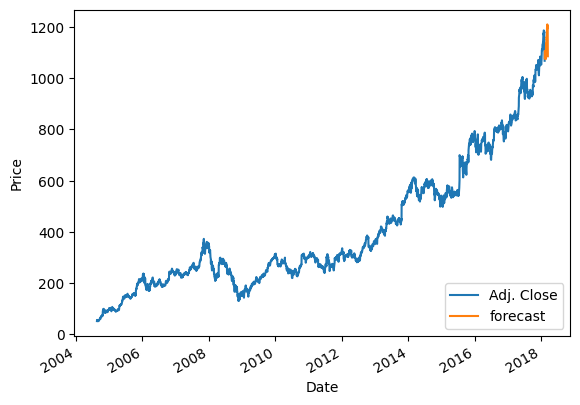

In [259]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [260]:
#Trying with SVM

model2=svm.SVR()
model2.fit(x_train,y_train)
accuracy2=model2.score(x_test,y_test)
print("Forecast (no. of days) : ",forecast_out)
print("Accuracy from SVM : ",accuracy2)

Forecast (no. of days) :  35
Accuracy from SVM :  0.7931343473465483
